In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [90]:
dataset=pd.read_csv('/content/insurance.csv')

In [91]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
dataset.shape

(1338, 7)

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [95]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


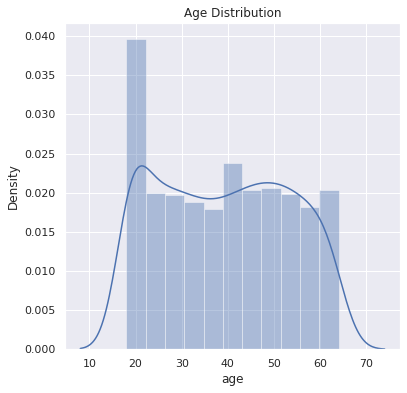

In [96]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

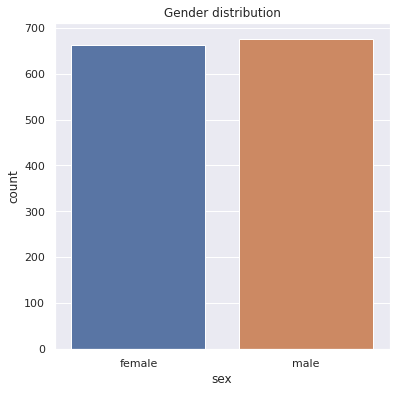

In [97]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=dataset)
plt.title('Gender distribution')
plt.show()

In [98]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


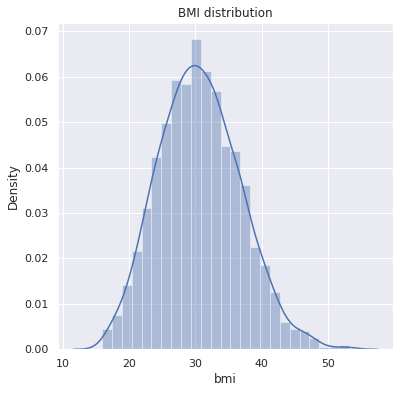

In [99]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Normal bmi range = 18.5 to 24.9

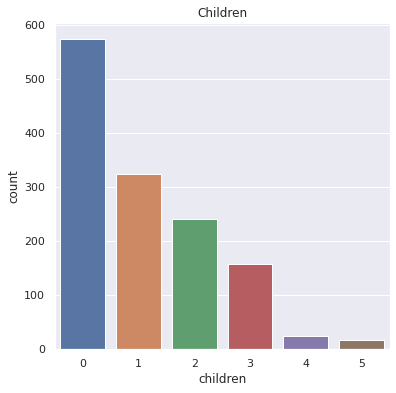

In [100]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=dataset)
plt.title('Children')
plt.show()

In [101]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

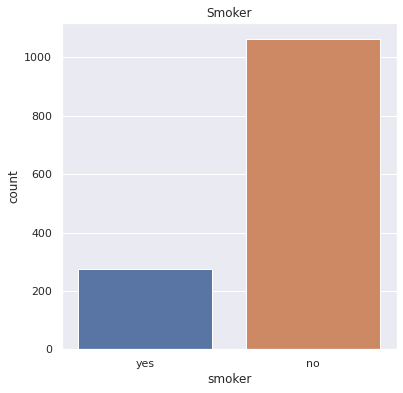

In [102]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=dataset)
plt.title('Smoker')
plt.show()

In [103]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

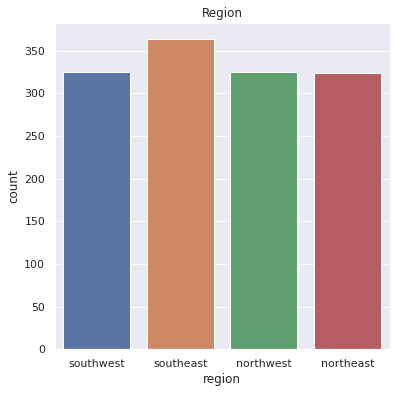

In [104]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=dataset)
plt.title('Region')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


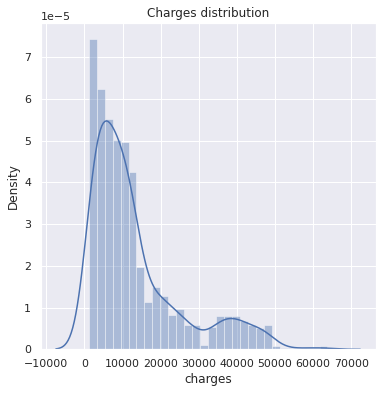

In [105]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('Charges distribution')
plt.show()

Data Preprocessing

Encoding categorical values

In [106]:
#encoding sex column
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Splitting Features and Targets

In [107]:
Y=dataset['charges']
X=dataset.drop(columns='charges',axis=1)

In [108]:
print(dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


In [109]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


Splitting data into training and testing data

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [111]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [112]:
regressor=LinearRegression()

In [113]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [114]:
#prediction on training data
training_predict=regressor.predict(X_train)

In [115]:
r2_train=metrics.r2_score(Y_train,training_predict)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [116]:
#prediction on testing data
testing_predict=regressor.predict(X_test)

In [117]:
r2_test=metrics.r2_score(Y_test,testing_predict)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


Building a predictive system

In [118]:
input_data=(31,1,25.74,0,1,0)

input_data_as_array=np.array(input_data)

input_data_reshaped=input_data_as_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost in USD is: ',prediction[0])

[3760.0805765]
The insurance cost in USD is:  3760.0805764960587
